# Business Understanding
####  A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues. 
#### They want to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. 
#### The company wants to know:
#### 1.Factors influncing the demand prediction
#### 2.Key factors which influnces the demand count



# 1. Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# importing numpy, pandas, matplotlib & seaborn (for advanced plots).
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# importing Scipy for statistical analysis
from scipy import stats



# Regular expressions
import re

# importing random.
import random
# Importing sklearn for the splitting the data into train & test
from sklearn.model_selection import train_test_split

# importing the MinMaxScaler from the sklearn for scalling up the variables
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing the statsmodels for performtion model builing & manual feature selection as it provides detailed descriptions about the model.
import statsmodels.api as sm  

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor


### 1.1 Setting Required Parameters

In [2]:
# to make graphs display inline
%matplotlib inline

# setting it to None to remove SettingWithCopyWarning
pd.options.mode.chained_assignment = None 

# setting it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.options.display.float_format = '{:.4f}'.format

# setting it to display max of 50 columns
pd.set_option('display.max_columns', 50) 

# setting it to display max of 100 rows
pd.set_option('display.max_rows', 100) 

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

# setting styles for seaborn
sns.set(style="ticks", color_codes=True)


# 2.Data Sourcing

In [3]:
file_path ="C:\Data\day.csv"
boombikes_df = pd.read_csv(file_path)

# 3.Data Reading

In [4]:
boombikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.1108,18.1812,80.5833,10.7499,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.9026,17.6869,69.6087,16.6521,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.0509,9.4703,43.7273,16.6367,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.2000,10.6061,59.0435,10.7398,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.3052,11.4635,43.6957,12.5223,82,1518,1600


In [5]:
boombikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
boombikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000,730.0000
mean,365.5000,2.4986,0.5000,6.5260,0.0288,2.9973,0.6836,1.3945,20.3193,23.7263,62.7652,12.7636,849.2493,3658.7575,4508.0068
std,210.8771,1.1102,0.5003,3.4502,0.1673,2.0062,0.4654,0.5448,7.5067,8.1503,14.2376,5.1958,686.4799,1559.7587,1936.0116
min,1.0000,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,1.0000,2.4243,3.9535,0.0000,1.5002,2.0000,20.0000,22.0000
25%,183.2500,2.0000,0.0000,4.0000,0.0000,1.0000,0.0000,1.0000,13.8119,16.8897,52.0000,9.0417,316.2500,2502.2500,3169.7500
50%,365.5000,3.0000,0.5000,7.0000,0.0000,3.0000,1.0000,1.0000,20.4658,24.3682,62.6250,12.1253,717.0000,3664.5000,4548.5000
75%,547.7500,3.0000,1.0000,10.0000,0.0000,5.0000,1.0000,2.0000,26.8806,30.4458,72.9896,15.6256,1096.5000,4783.2500,5966.0000
max,730.0000,4.0000,1.0000,12.0000,1.0000,6.0000,1.0000,3.0000,35.3283,42.0448,97.2500,34.0000,3410.0000,6946.0000,8714.0000


# 4.Checking and Cleaning Data

### 4.1 Check Null values

In [7]:
# calculating the row null % in the dataframe
print(round(100*boombikes_df.isnull().sum(axis=1)/len(boombikes_df), 2))


0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
       ...  
725   0.0000
726   0.0000
727   0.0000
728   0.0000
729   0.0000
Length: 730, dtype: float64


#### Data is clean and no null value spotted

### 4.2 Drop Unwanted columns

In [8]:

print("Rows and Columns before dropping columns: {}".format(boombikes_df.shape))

boombikes_df = boombikes_df.drop(["instant","dteday","casual","registered"], axis = 1)

print("Rows and Columns after dropping columns: {}".format(boombikes_df.shape))


Rows and Columns before dropping columns: (730, 16)
Rows and Columns after dropping columns: (730, 12)


In [9]:
boombikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### 4.3 Finding unique value count in each column

In [10]:
boombikes_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

#### We have two temperature column and one needed to be dropped,Since atemp has more unique values than temp,we drop temp

### 4.4 Drop Temp column

In [11]:
print("Rows and Columns before dropping columns: {}".format(boombikes_df.shape))

boombikes_df = boombikes_df.drop(["temp"], axis = 1)

print("Rows and Columns after dropping columns: {}".format(boombikes_df.shape))


Rows and Columns before dropping columns: (730, 12)
Rows and Columns after dropping columns: (730, 11)


In [12]:
boombikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.1812,80.5833,10.7499,985
1,1,0,1,0,0,0,2,17.6869,69.6087,16.6521,801
2,1,0,1,0,1,1,1,9.4703,43.7273,16.6367,1349
3,1,0,1,0,2,1,1,10.6061,59.0435,10.7398,1562
4,1,0,1,0,3,1,1,11.4635,43.6957,12.5223,1600


### 4.5 Renaming column names

In [13]:
boombikes_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [14]:
boombikes_df.rename(columns= {'yr':"year","mnth":"month","atemp":"Modified_temperature","cnt":"Target_count", "hum":"humidity"}, inplace=True)

In [15]:
boombikes_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,Modified_temperature,humidity,windspeed,Target_count
0,1,0,1,0,6,0,2,18.1812,80.5833,10.7499,985
1,1,0,1,0,0,0,2,17.6869,69.6087,16.6521,801
2,1,0,1,0,1,1,1,9.4703,43.7273,16.6367,1349
3,1,0,1,0,2,1,1,10.6061,59.0435,10.7398,1562
4,1,0,1,0,3,1,1,11.4635,43.6957,12.5223,1600


### 4.6 Standardising  the categoriacl variable

In [16]:
#Standardising Season column
boombikes_df.season.replace(to_replace = [1,2,3,4], value = ["spring","summer","fall","winter"], inplace=True)
boombikes_df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [17]:
#Standardising month column
boombikes_df.month.replace(to_replace = [1,2,3,4,5,6,7,8,9,10,11,12], value = ["jan","feb","mar","april","may","june","july","aug","sep","oct","nov","dec"], inplace=True)
boombikes_df.month.value_counts()

dec      62
may      62
jan      62
aug      62
july     62
mar      62
oct      62
april    60
june     60
sep      60
nov      60
feb      56
Name: month, dtype: int64

In [18]:
#Standardising weekday column
boombikes_df.weekday.replace(to_replace = [0,1,2,3,4,5,6], value = ["sun","mon","tue","wed","thru","fri","sat"], inplace=True)
boombikes_df.weekday.value_counts()

mon     105
sun     105
sat     105
fri     104
tue     104
thru    104
wed     103
Name: weekday, dtype: int64

In [19]:
#Standardising weathersit column
boombikes_df.weathersit.replace(to_replace = [1,2,3,4], value =["clear","mist+cloudy","light_rain+light_snow","heavy_rain+thunderstrom"], inplace=True)
boombikes_df.weathersit.value_counts()

clear                    463
mist+cloudy              246
light_rain+light_snow     21
Name: weathersit, dtype: int64

# 5.Univariate Analysis

In [20]:
boombikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   season                730 non-null    object 
 1   year                  730 non-null    int64  
 2   month                 730 non-null    object 
 3   holiday               730 non-null    int64  
 4   weekday               730 non-null    object 
 5   workingday            730 non-null    int64  
 6   weathersit            730 non-null    object 
 7   Modified_temperature  730 non-null    float64
 8   humidity              730 non-null    float64
 9   windspeed             730 non-null    float64
 10  Target_count          730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### Season Column analysis

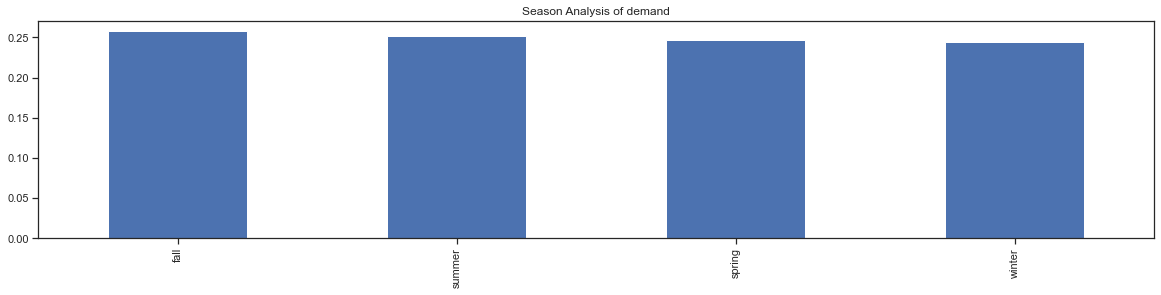

In [21]:
Season_Analysis = boombikes_df["season"].value_counts(normalize=True)

plt.figure(figsize=(20,4))
Season_Analysis.plot(kind='bar')
plt.title('Season Analysis of demand')

plt.show()


### Weather Column analysis

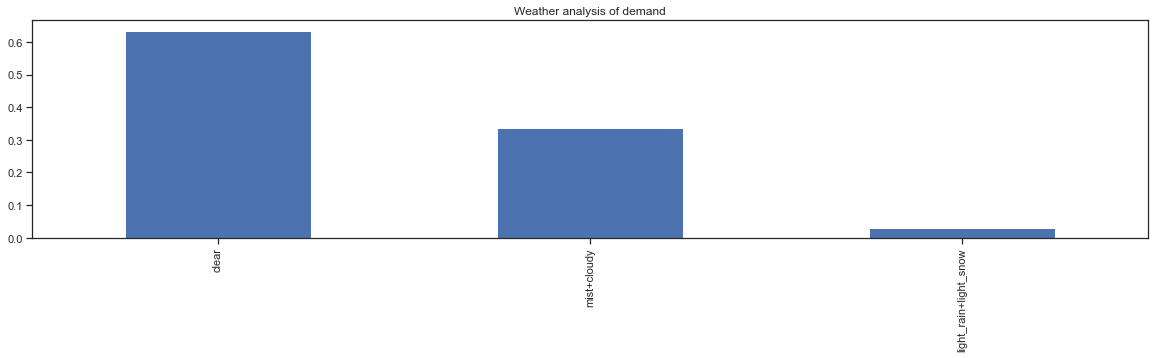

In [22]:
Weather_Analysis = boombikes_df["weathersit"].value_counts(normalize=True)

plt.figure(figsize=(20,4))
Weather_Analysis.plot(kind='bar')
plt.title('Weather analysis of demand')

plt.show()

#### As per the Univeriate analyisis we could visulaize the demand  is high on clear sky, and low demand during Light rain and no demand during heavy rain and thunderstrom 

### Continous Variable analysis

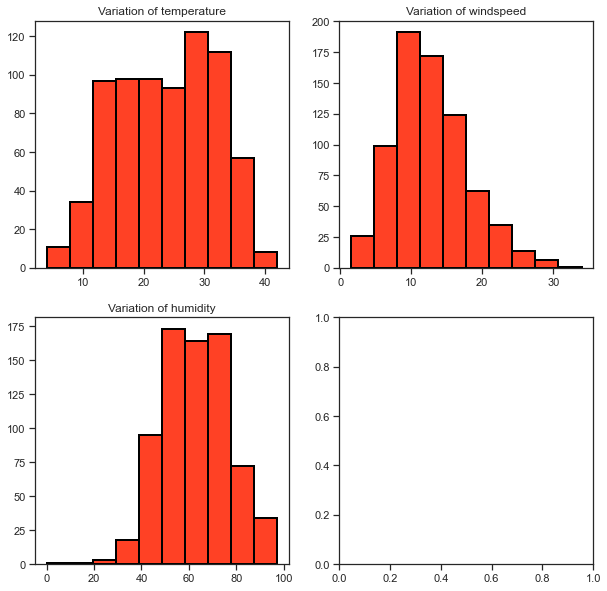

In [23]:
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="Modified_temperature",data=boombikes_df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temperature")
axes[0,1].hist(x="windspeed",data=boombikes_df,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of windspeed")
axes[1,0].hist(x="humidity",data=boombikes_df,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of humidity")
fig.set_size_inches(10,10)

#### Other columns has stable distribution of values hence not much of univariate analysis we could perform

# 6.Bivariate Analysis
### Analysis of Catogorical variable Vs Target count

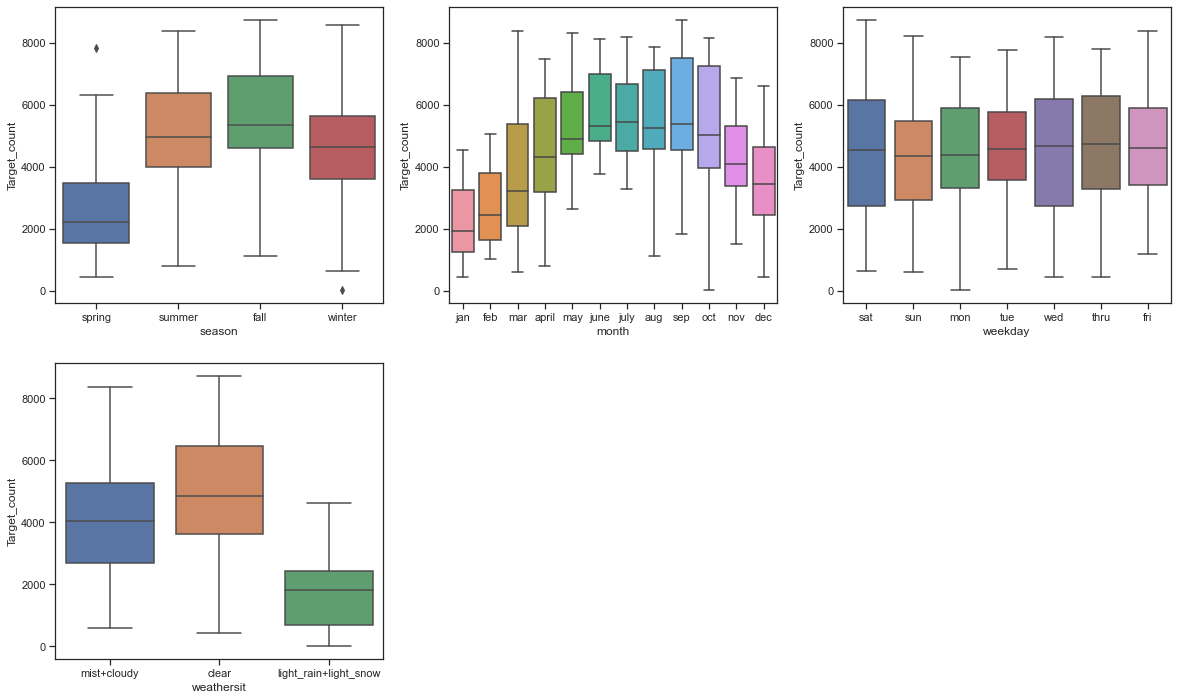

In [24]:

plt.figure(figsize=(20, 12))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'Target_count', data = boombikes_df)

plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'Target_count', data = boombikes_df)

plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'Target_count', data = boombikes_df)

plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'Target_count', data = boombikes_df)

plt.show()



# 7.Mulivariate Analysis

### 7.1 Analysis of Month and Year Vs Target count

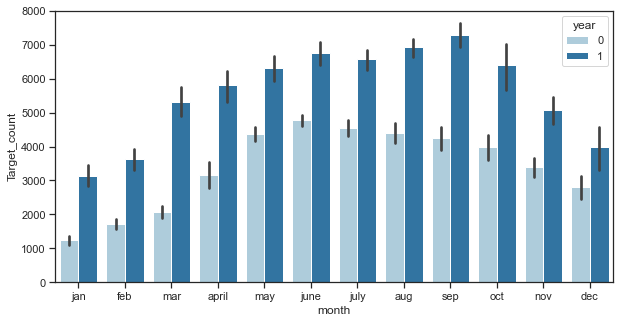

In [25]:
plt.figure(figsize=(10,5))
sns.barplot('month','Target_count',hue='year',data=boombikes_df,palette='Paired')

### 7.2  Analysis of Month and season Vs Target count

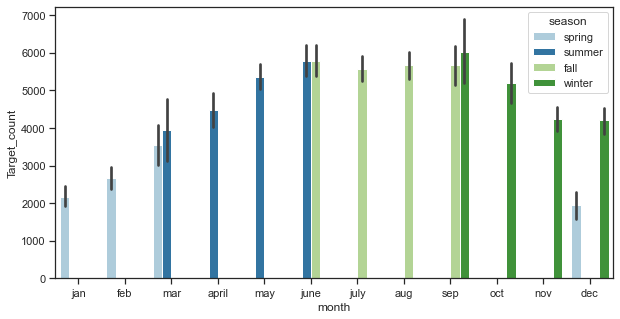

In [26]:
plt.figure(figsize=(10,5))
sns.barplot('month','Target_count',hue='season',data=boombikes_df,palette='Paired')

### 7.3 Analysis of Weather and Season Vs Target count

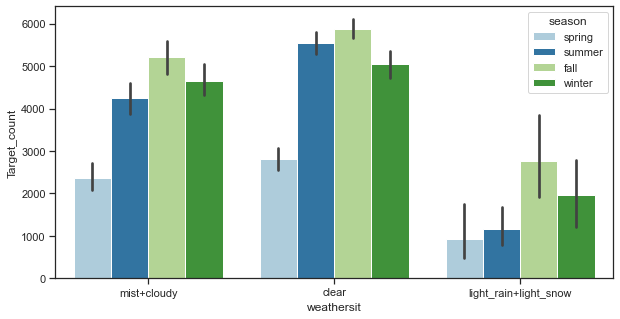

In [27]:
plt.figure(figsize=(10,5))
sns.barplot('weathersit','Target_count',hue='season',data=boombikes_df,palette='Paired')

### 7.4  Visualizing the Relationship among variables



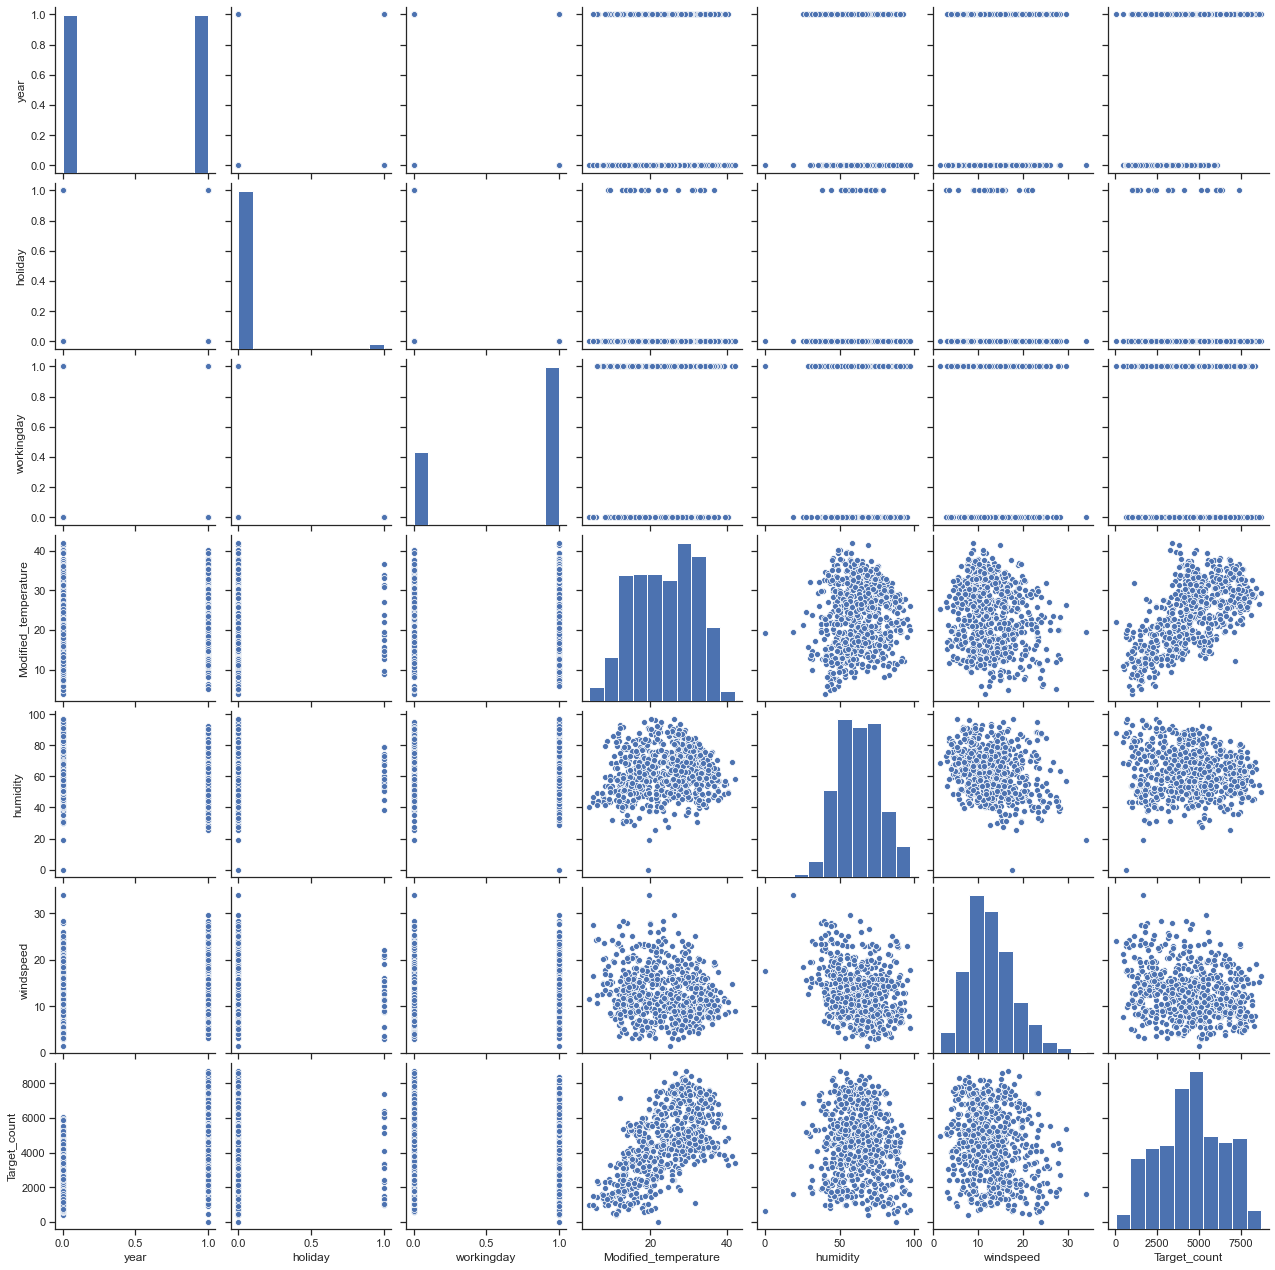

In [28]:
sns.pairplot(boombikes_df)



### Understanding based on Bivariate and Multivariate analysis
#### •	Analysis of the categorical variables shows us that, majority of the users take bikes on the “fall” based on the analysis from season against the target variable “count”.

#### •	Majority of the customers taking bike has increased from the month of April to October & gradually reduces on November & December.

#### a)	This gives us a hint that most of the customer prefer bike when the climate is not too cold nor sunny.

#### b)	There is also a high relation to temperature which was predicted has a prime factor based on which the user are taking the bike.

#### •	Compared to working days most of the users have taken bike on Saturday & fallowed by Wednesday as second highest on the weekdays

#### •	Users prefer to go with bikes when the climate is mostly clear weather (no rain & snow) & mist + cloudy durations.


# 8.Correlation 

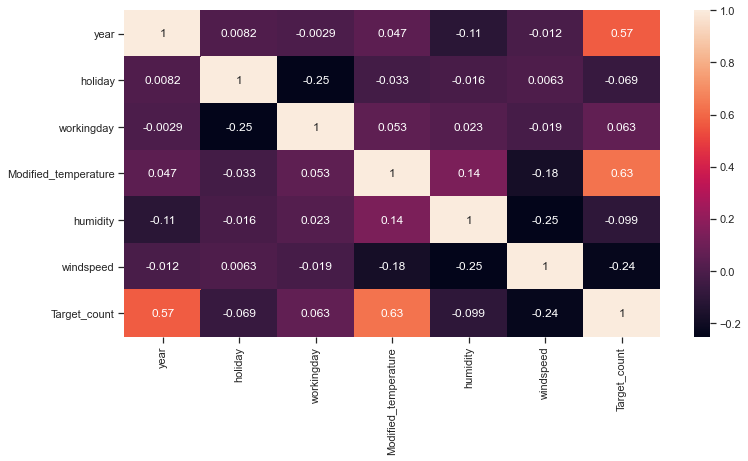

In [29]:
plt.figure(figsize = (12,6))
sns.heatmap(boombikes_df.corr(),annot=True)


# 8. Data preparation for Linear Regression

### 8.1 Dummification of variables

In [30]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'dummy'
dummy = pd.get_dummies(boombikes_df['season'])


In [31]:
dummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [32]:
# Let's drop the first column from status df using 'drop_first = True'

dummy = pd.get_dummies(boombikes_df['season'], drop_first = True)


In [33]:
boombikes_df = pd.concat([boombikes_df,dummy], axis = 1)

In [34]:
# Drop 'season' as we have created the dummies for it

boombikes_df.drop(['season'], axis = 1, inplace = True)


In [35]:
boombikes_df.head()

,year,month,holiday,weekday,workingday,weathersit,Modified_temperature,humidity,windspeed,Target_count,spring,summer,winter
0,0,jan,0,sat,0,mist+cloudy,18.1812,80.5833,10.7499,985,1,0,0
1,0,jan,0,sun,0,mist+cloudy,17.6869,69.6087,16.6521,801,1,0,0
2,0,jan,0,mon,1,clear,9.4703,43.7273,16.6367,1349,1,0,0
3,0,jan,0,tue,1,clear,10.6061,59.0435,10.7398,1562,1,0,0
4,0,jan,0,wed,1,clear,11.4635,43.6957,12.5223,1600,1,0,0


In [36]:
# Get the dummy variables for the feature 'month' and store it in a new variable - 'dummy'
dummy = pd.get_dummies(boombikes_df['month'])

In [37]:
dummy.head()

,april,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [38]:
# Let's drop the first column from dummy using 'drop_first = True'

dummy = pd.get_dummies(boombikes_df['month'], drop_first = True)


In [39]:
boombikes_df = pd.concat([boombikes_df,dummy], axis = 1)
# Drop 'month' as we have created the dummies for it

boombikes_df.drop(['month'], axis = 1, inplace = True)
boombikes_df.head()


,year,holiday,weekday,workingday,weathersit,Modified_temperature,humidity,windspeed,Target_count,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,sat,0,mist+cloudy,18.1812,80.5833,10.7499,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,sun,0,mist+cloudy,17.6869,69.6087,16.6521,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,mon,1,clear,9.4703,43.7273,16.6367,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,tue,1,clear,10.6061,59.0435,10.7398,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,wed,1,clear,11.4635,43.6957,12.5223,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'dummy'
dummy = pd.get_dummies(boombikes_df['weekday'])

In [41]:
dummy.head()

,fri,mon,sat,sun,thru,tue,wed
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [42]:
# Let's drop the first column from dummy using 'drop_first = True'

dummy = pd.get_dummies(boombikes_df['weekday'], drop_first = True)
boombikes_df = pd.concat([boombikes_df,dummy], axis = 1)
# Drop 'weekday' as we have created the dummies for it

boombikes_df.drop(['weekday'], axis = 1, inplace = True)
boombikes_df.head()


,year,holiday,workingday,weathersit,Modified_temperature,humidity,windspeed,Target_count,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thru,tue,wed
0,0,0,0,mist+cloudy,18.1812,80.5833,10.7499,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,mist+cloudy,17.6869,69.6087,16.6521,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,clear,9.4703,43.7273,16.6367,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,clear,10.6061,59.0435,10.7398,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,clear,11.4635,43.6957,12.5223,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'dummy'
dummy = pd.get_dummies(boombikes_df['weathersit'])
dummy.head()

,clear,light_rain+light_snow,mist+cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [44]:
# Let's drop the first column from dummy using 'drop_first = True'

dummy = pd.get_dummies(boombikes_df['weathersit'], drop_first = True)
boombikes_df = pd.concat([boombikes_df,dummy], axis = 1)
# Drop 'weathersit' as we have created the dummies for it

boombikes_df.drop(['weathersit'], axis = 1, inplace = True)
boombikes_df.head()

,year,holiday,workingday,Modified_temperature,humidity,windspeed,Target_count,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thru,tue,wed,light_rain+light_snow,mist+cloudy
0,0,0,0,18.1812,80.5833,10.7499,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.6869,69.6087,16.6521,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.4703,43.7273,16.6367,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.6061,59.0435,10.7398,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.4635,43.6957,12.5223,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### 8.2 Spliting data into Test and Train Data

In [45]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(boombikes_df, train_size = 0.7, test_size = 0.3, random_state = 100)



In [46]:
# Rescaling using MinMax
scaler = MinMaxScaler()

In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["Modified_temperature","humidity","Target_count"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [48]:
df_train.head()

,year,holiday,workingday,Modified_temperature,humidity,windspeed,Target_count,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thru,tue,wed,light_rain+light_snow,mist+cloudy
653,1,0,1,0.5011,0.5754,12.2088,0.8642,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.7664,0.7256,11.0835,0.8277,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.4390,0.6402,10.7923,0.4653,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.2003,0.4981,23.5005,0.2041,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.3917,0.5045,8.7083,0.4830,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [49]:
df_train.describe()

,year,holiday,workingday,Modified_temperature,humidity,windspeed,Target_count,spring,summer,winter,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep,mon,sat,sun,thru,tue,wed,light_rain+light_snow,mist+cloudy
count,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000,510.0000
mean,0.5078,0.0255,0.6765,0.5130,0.6504,12.8313,0.5136,0.2431,0.2451,0.2490,0.0961,0.0843,0.0667,0.0882,0.0765,0.0745,0.0980,0.0843,0.0863,0.0863,0.0804,0.1510,0.1549,0.1431,0.1333,0.1314,0.1588,0.0294,0.3431
std,0.5004,0.1578,0.4683,0.2124,0.1459,5.2918,0.2246,0.4294,0.4306,0.4329,0.2950,0.2781,0.2497,0.2839,0.2660,0.2629,0.2977,0.2781,0.2810,0.2810,0.2722,0.3584,0.3622,0.3506,0.3403,0.3381,0.3659,0.1691,0.4752
min,0.0000,0.0000,0.0000,0.0000,0.0000,2.8344,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.3321,0.5386,9.0419,0.3564,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,1.0000,0.0000,1.0000,0.5268,0.6537,12.0832,0.5186,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,1.0000,0.0000,1.0000,0.6885,0.7548,15.7509,0.6847,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,34.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


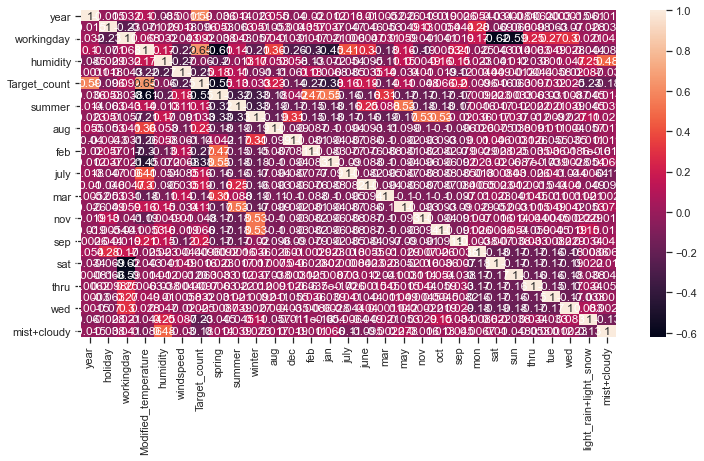

In [50]:
plt.figure(figsize = (12,6))
sns.heatmap(df_train.corr(),annot=True)


#### This shows that the modified temperature correlates with the target count

### 8.2 Preparing data

In [51]:
y_train = df_train.pop('Target_count')
X_train = df_train
y_test = df_test.pop('Target_count')
X_test = df_test



# 9. Model building

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# running RFE
rfe = RFE(lr, 10)             
rfe = rfe.fit(X_train, y_train)


In [53]:
col = X_train.columns[rfe.support_]
col


Index(['year', 'holiday', 'Modified_temperature', 'humidity', 'spring',
       'winter', 'sep', 'sat', 'light_rain+light_snow', 'mist+cloudy'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['workingday', 'windspeed', 'summer', 'aug', 'dec', 'feb', 'jan', 'july',
       'june', 'mar', 'may', 'nov', 'oct', 'mon', 'sun', 'thru', 'tue', 'wed'],
      dtype='object')

### 9.1 Building a Linear model

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
# Running the linear model
lr_1 = sm.OLS(y_train,X_train_rfe).fit()


In [56]:
#Let's see the summary of our linear model
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:           Target_count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.6
Date:                Fri, 31 Jul 2020   Prob (F-statistic):          2.19e-178
Time:                        18:49:30   Log-Likelihood:                 475.15
No. Observations:                 510   AIC:                            -928.3
Df Residuals:                     499   BIC:                            -881.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

#### Since holiday insignificant we can drop it

In [57]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

In [58]:
X_train_new = X_train_new.drop(['const'], axis=1)

### Creating constant

In [59]:
# Adding a constant variable 
X_train_lr = sm.add_constant(X_train_new)
# Running the linear model
lr_2 = sm.OLS(y_train,X_train_lr).fit()
#Let's see the summary of our linear model
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:           Target_count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     245.3
Date:                Fri, 31 Jul 2020   Prob (F-statistic):          4.18e-177
Time:                        18:49:30   Log-Likelihood:                 469.27
No. Observations:                 510   AIC:                            -918.5
Df Residuals:                     500   BIC:                            -876.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

### 9.2 Caluclate Variance Insignificant faactor

In [60]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,humidity,21.8000
1,Modified_temperature,12.6000
8,mist+cloudy,2.2300
3,spring,2.2200
0,year,2.0300
4,winter,2.0000
7,light_rain+light_snow,1.2000
6,sat,1.1700
5,sep,1.1500


#### Variance shouldnot be more than 5, hence we drop columns which has more than 5 VIF value

### 9.3 Check model

In [61]:
print(lr_2.params)


const                    0.2442
year                     0.2338
Modified_temperature     0.4699
humidity                -0.0824
spring                  -0.1197
winter                   0.0522
sep                      0.0770
sat                      0.0177
light_rain+light_snow   -0.2714
mist+cloudy             -0.0627
dtype: float64


In [62]:
#Let's see the summary of our linear model
print(lr_2.summary())


                            OLS Regression Results                            
Dep. Variable:           Target_count   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     245.3
Date:                Fri, 31 Jul 2020   Prob (F-statistic):          4.18e-177
Time:                        18:49:30   Log-Likelihood:                 469.27
No. Observations:                 510   AIC:                            -918.5
Df Residuals:                     500   BIC:                            -876.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

### 9.4 Residual Analysis

In [63]:
X_train_lr.columns

Index(['const', 'year', 'Modified_temperature', 'humidity', 'spring', 'winter',
       'sep', 'sat', 'light_rain+light_snow', 'mist+cloudy'],
      dtype='object')

In [64]:
y_train_tcount = lr_2.predict(X_train_lr)

Text(0.5, 0, 'Errors')

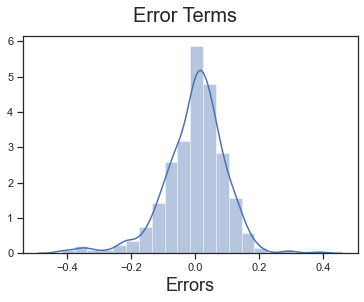

In [65]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_tcount), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  


# 10. Making Predictions


In [66]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]


In [67]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [68]:
lr_test = sm.OLS(y_test, X_test_new).fit()

In [69]:
print(lr_test.summary())

                            OLS Regression Results                            
Dep. Variable:           Target_count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     110.2
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           2.43e-74
Time:                        18:49:31   Log-Likelihood:                 214.39
No. Observations:                 219   AIC:                            -408.8
Df Residuals:                     209   BIC:                            -374.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.34

In [70]:
# Making predictions
y_pred = lr_2.predict(X_test_new)


# 11.Model Evaluation

### 11.1 Actual vs Predicted values

Text(0, 0.5, 'y_pred')

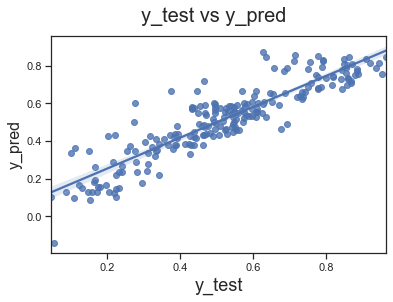

In [71]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.regplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)


# Conclusioin

We can see that the equation of our best fitted line is:

Target_count = 0.2362 * year + 0.0535 * workingday + 0.3845 * Modified_temperature + -0.1560 * spring + 0.0731 * sep + 0.0622 * sat + -0.2930 * lightSnow+rain + -0.0800 * mist+cloudy
